# Exercise 10: Hierarchical clustering of the grain data

In the video, you learnt that the SciPy `linkage()` function performs hierarchical clustering on an array of samples.  Use the `linkage()` function to obtain a hierarchical clustering of the grain samples, and use `dendrogram()` to visualize the result.  A sample of the grain measurements is provided in the array `samples`, while the variety of each grain sample is given by the list `varieties`.


**Step 1:** Import:

 + `linkage` and `dendrogram` from `scipy.cluster.hierarchy`.
 + `matplotlib.pyplot` as `plt`.
 + `pandas`
 + `load_iris` and `train_test_split`

In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from scipy.cluster.hierarchy import linkage, dendrogram

import matplotlib.pyplot as plt


**Step 2:** Load the dataset _(done for you)_.

In [ ]:

iris_data = load_iris()


In [ ]:

#iris_data

In [ ]:
df["target"]

In [114]:
#Create pd DF the same way you did the first day
#Create the class and target columns and remove de cm from the columns names

def create_df():
    
    # YOUR CODE HERE
    df = pd.DataFrame(iris_data['data'],columns= ['sepal length', 'sepal width', 'petal length', 'petal width'] )
    df["target"] = iris_data.target
    df["class"] = df["target"].apply(lambda x: iris_data.target_names[x])
    return df
    #raise NotImplementedError()
df_iris = create_df()
df_iris.sample(n=10)

,sepal length,sepal width,petal length,petal width,target,class
81,5.5,2.4,3.7,1.0,1,versicolor
22,4.6,3.6,1.0,0.2,0,setosa
91,6.1,3.0,4.6,1.4,1,versicolor
75,6.6,3.0,4.4,1.4,1,versicolor
64,5.6,2.9,3.6,1.3,1,versicolor
127,6.1,3.0,4.9,1.8,2,virginica
54,6.5,2.8,4.6,1.5,1,versicolor
62,6.0,2.2,4.0,1.0,1,versicolor
130,7.4,2.8,6.1,1.9,2,virginica
83,6.0,2.7,5.1,1.6,1,versicolor


In [ ]:
assert df_iris['sepal length'].shape == (150,)
assert df_iris['sepal width'].shape == (150,)
assert df_iris['petal length'].shape == (150,)
assert df_iris['petal width'].shape == (150,)
assert df_iris['target'].shape == (150,)
assert df_iris['class'].shape == (150,)

In [ ]:

#From our data we will only get variable columns as np.array
x = 0
# YOUR CODE HERE
x = df_iris[['sepal length', 'sepal width', 'petal length', 'petal width']].to_numpy()
#raise NotImplementedError()
#x

In [ ]:
assert x.shape == (150,4)

**Step 3:** Perform hierarchical clustering on `samples` using the `linkage()` function with the `method='complete'` keyword argument. Assign the result to `mergings`.

In [ ]:
mergings = 0 
# YOUR CODE HERE
mergings = linkage(x)
#raise NotImplementedError()

In [ ]:
mergins = linkage(x,method='complete')

In [ ]:
#mergins

In [ ]:
assert mergings.shape == (149,4)

**Step 4:** Plot a dendrogram using the `dendrogram()` function on `mergings`, specifying the keyword arguments `labels=varieties`, `leaf_rotation=90`, and `leaf_font_size=6`.  Remember to call `plt.show()` afterwards, to display your plot.

In [ ]:
dn = 0
# YOUR CODE HERE

chart = plt.figure(figsize=(20,10))
dn = dendrogram(mergings)
plt.show()

In [ ]:
assert type(dn) == type(dendrogram(np.random.rand(15, 4)))

## K-MEANS

for this next part we will use the K-Means algorithm in order to cluster your data

**Step 1:** 
+ import `KMeans` from `sklearn.cluster`
+ loading our new datasets

In [ ]:
from sklearn.cluster import KMeans

df = pd.read_csv('ch1ex1.csv')
points = df.values

new_df = pd.read_csv('ch1ex2.csv')
new_points = new_df.values


**Step 2:** Using `KMeans()`, create a `KMeans` instance called `model` to find `3` clusters. To specify the number of clusters, use the `n_clusters` keyword argument


In [ ]:
model = 0
# YOUR CODE HERE
model = KMeans(n_clusters=3)
#raise NotImplementedError()

In [ ]:
assert type(model)== type(KMeans())

**Step 4:** Use the `.fit()` method of `model` to fit the model to the array of points `points`.

In [ ]:
#points

In [ ]:
# YOUR CODE HERE

model.fit(points)
model
#raise NotImplementedError()

**Step 5:** Use the `.predict()` method of `model` to predict the cluster labels of `points`, assigning the result to `labels`.

In [ ]:
# YOUR CODE HERE
labels = model.predict(points)
#raise NotImplementedError()
labels

In [ ]:
assert labels[labels.argmax()] == 2
assert labels.shape == (300,)

In [128]:
# Make a function that returns 3 numpy arrays each one with the points associated for each class
#If the label is 0 they go into data_0
#If the label is 1 they go into data_1
#If the label is 2 they go into data_2
def separate_labels(labels, points):
    data_0 = []
    data_1 = []
    data_2 = []

    # YOUR CODE HERE
    for i in range(labels.shape[0]):
        if labels[i] == 0:
            data_0.append(points[i])
        elif labels[i] == 1:
            data_1.append(points[i])
        else:
            data_2.append(points[i])

    #raise NotImplementedError()
    data_0 = np.array(data_0)
    data_1 = np.array(data_1)
    data_2 = np.array(data_2)
    return np.array([data_0,data_1,data_2])


data_0,data_1,data_2 = separate_labels(labels, points)

print(data_0.shape);
print(data_1.shape);
print(data_2.shape);

(111, 2)
(94, 2)
(95, 2)
<ipython-input-128-cb2cfd4f118a>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([data_0,data_1,data_2])


In [105]:
labels

array([0, 2, 1, 1, 2, 2, 1, 0, 2, 2, 1, 0, 2, 1, 2, 0, 1, 1, 0, 1, 2, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 0, 0, 2, 0, 0, 1, 2, 2,
       2, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 1, 2, 0, 0, 1, 1, 2,
       1, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       0, 1, 2, 1, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 2, 1, 0, 1, 1, 1, 2, 2,
       0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 2, 2, 1, 1,
       2, 0, 2, 0, 1, 2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 0, 0, 0, 1, 1, 2,
       1, 2, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0, 2, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 2, 0, 2,
       2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 0, 0, 2, 0, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 0, 0, 2, 1, 1, 2, 0, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0,
       1, 2, 2, 1, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2])

In [115]:
separate_labels

<function __main__.separate_labels(labels, points)>

In [ ]:
assert abs(data_0.shape[0] - 94) <= 20
assert abs(data_1.shape[0] - 95) <= 20
assert abs(data_2.shape[0] - 111) <= 20

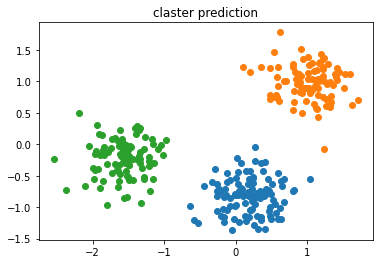

In [101]:
# plotting the data 

plt.scatter(data_0[:,0], data_0[:,1]);
plt.scatter(data_1[:,0], data_1[:,1]);
plt.scatter(data_2[:,0], data_2[:,1]);
plt.title('claster prediction')
plt.show()
# YOUR CODE HERE
#raise NotImplementedError()

**Step 7:** Use the `.predict()` method of `model` to predict the cluster labels of `new_points`, assigning the result to `new_labels`.  Notice that KMeans can assign previously unseen points to the clusters it has already found!

In [130]:
#
# ]new_points

In [102]:

# YOUR CODE HERE
new_labels = model.predict(new_points)
#raise NotImplementedError()
new_labels

array([1, 1, 2, 2, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       2, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 2, 0,
       2, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 0, 2, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0,
       2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 0, 2])

In [116]:
assert new_labels[new_labels.argmax()] == 2
assert new_labels.shape == (100,)

In [131]:
#separate the data by labels like we did before

new_0,new_1,new_2 = separate_labels(new_labels, new_points)

print(new_0.shape);
print(new_1.shape);
print(new_2.shape);        

#raise NotImplementedError()


(32, 2)
(34, 2)
(34, 2)
<ipython-input-128-cb2cfd4f118a>:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array([data_0,data_1,data_2])


In [ ]:
new_labels.shape()

In [132]:
assert abs(new_0.shape[0] - 34) <= 5
assert abs(new_1.shape[0] - 34) <= 5
assert abs(new_2.shape[0] - 34) <= 5

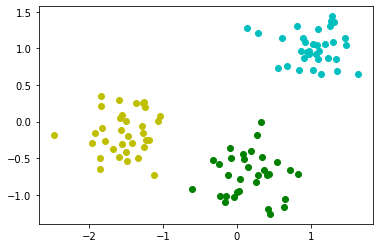

In [122]:
#plot the new labels
plt.scatter(new_0[:,0],new_0[:,1], c ='g')
plt.scatter(new_1[:,0],new_1[:,1], c= 'c')
plt.scatter(new_2[:,0],new_2[:,1], c= 'y')
# YOUR CODE HERE
#raise NotImplementedError()

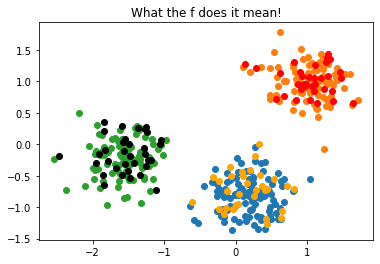

In [139]:
#plot all the points together
plt.scatter(data_0[:,0], data_0[:,1]);
plt.scatter(data_1[:,0], data_1[:,1]);
plt.scatter(data_2[:,0], data_2[:,1]);

plt.scatter(new_0[:,0],new_0[:,1], c= 'orange');
plt.scatter(new_1[:,0],new_1[:,1], c= 'red');
plt.scatter(new_2[:,0],new_2[:,1], c= 'black');
plt.title('What the f does it mean!');

# YOUR CODE HERE
#raise NotImplementedError()